In [1]:
from tensorflow.keras.losses import Reduction
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


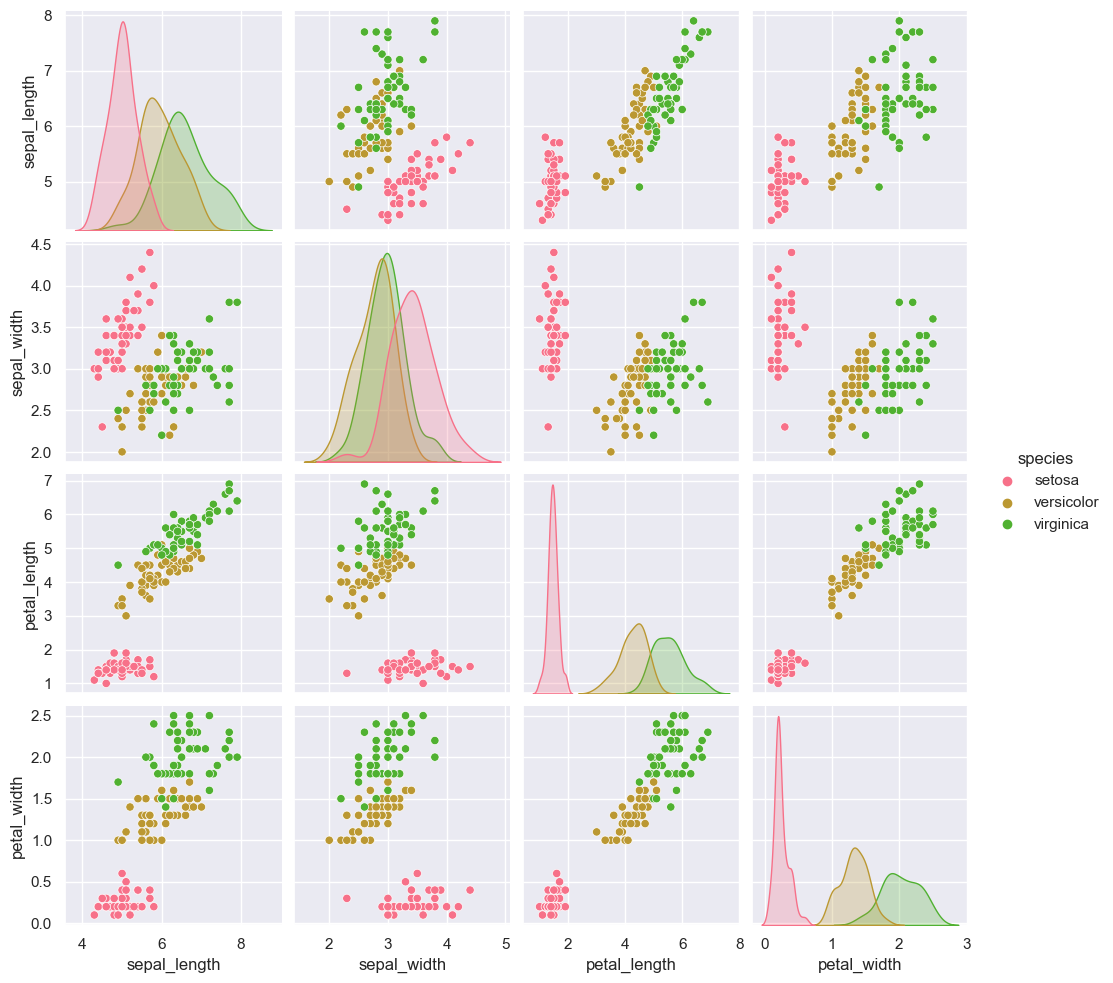

In [3]:
sns.set(style="ticks")
sns.set(palette='husl')
sns.pairplot(iris, hue='species')

In [4]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

In [5]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y = pd.get_dummies(y1).values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [7]:
Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

In [8]:
CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction=Reduction.AUTO,
    name='categorical_crossentropy'
)

In [17]:
# deklararujemy model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')

])

# kompilujemy model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# wypisujemy wartości warstw modelu
model.summary()

"""# trenujemy model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________


'# trenujemy model\nhistory = model.fit_generator(\n    train_data_gen,\n    steps_per_epoch=total_train // batch_size,\n    epochs=epochs,\n    validation_data=val_data_gen,\n    validation_steps=total_val // batch_size\n)'

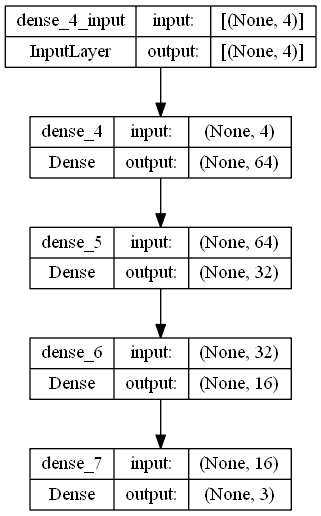

In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

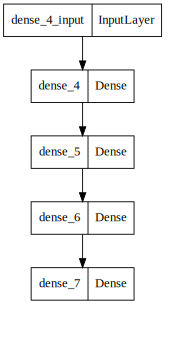

In [19]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))

In [20]:
X_train.size

480

In [21]:
y_train.size

360

In [22]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1130 - accuracy: 0.3333
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 1.0371 - accuracy: 0.3833
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.9784 - accuracy: 0.3417
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.9270 - accuracy: 0.7000
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.8714 - accuracy: 0.8333
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.8139 - accuracy: 0.8583
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7638 - accuracy: 0.7917
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.7083
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.8167
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.9167


In [23]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 62ms/step


In [24]:
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]
